## More styling

Bottlenose dolphins are [incredible creatures](https://en.wikipedia.org/wiki/Bottlenose_dolphin#:~:text=.%5B41%5D-,Physiology,-and%20senses%5B). We'll honour them in our own small way by plotting [data](http://www-personal.umich.edu/~mejn/netdata/) from a fascinating study by [Lusseau et al, 2003](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.174.3721&rep=rep1&type=pdf). A group of dolphins were continuously observed for 7 years, enabling inference of "preferred companionships", hence various studies of the nature and dynamics of their relationships.

The example shows
- how to nicely lay out a non-trivial association network
- further examples of tweaking appearance attributes (colour, size, labels etc)

In [ ]:
# If running for the first rime, uncomment below to install dependencies

# !sudo apt install libgraphviz-dev graphviz  # on Colab, Debian / Ubuntu etc - or on a Mac: brew install graphviz
# !pip install alph[graphviz] cython "git+https://github.com/connectedcompany/forceatlas2.git"

In [1]:
import sys
import altair as alt
import networkx as nx

".." not in sys.path and sys.path.append("..")
from alph import alph, layout, util

util.set_altair_renderer()

Let's load the graph, and add centrality measures that we'll use to aid the visual representation.

In [2]:
G = nx.read_gml("data/dolphins.gml", label="id")
nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness_centrality")

Plot the network, using
- degree centrality to size the nodes
- sex for node colour, noting that sex was not known for 4 individuals
- selective labelling based on high centrality scores
- non-default text font

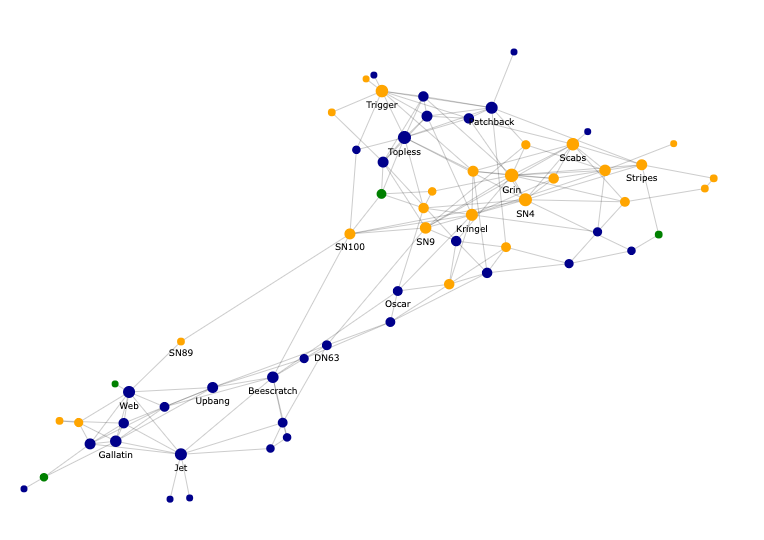

In [3]:
alph(
    G,
    layout_fn=lambda g: 
        layout.force_atlas(g, strongGravityMode=False, gravity=2, seed=33
    ),
    node_args=dict(
        size=alt.Size(
            "degree_centrality", scale=alt.Scale(domain=[0,0.5], range=[6**2, 20**2]), legend=None
        ),
        fill=alt.Color(
            "sex", scale=alt.Scale(domain=["M", "F", "U"], range=["darkblue", "orange", "green"]), legend=None
        ),
        tooltip_attrs=["label", "sex"],
        label_attr=alt.condition(
            (alt.datum.degree_centrality > 0.14) | (alt.datum.betweenness_centrality > 0.05),
            "label",
            alt.value("")
        ),
        label_offset=8,
        label_size=9,
    ),
    edge_args=dict(
        color="black",
        opacity=0.4,
        strokeWidth=alt.value(0.5),
    ),
).configure_view(
    stroke="transparent"
).configure_text(
    font="Verdana, Sans"
).properties(
    width=720, height=500, padding=20
)